# Pitchfork Over the Years

In this project, we will be looking at the music website Pitchfork and how it's reviews have changed over the years. Pitchfork is a website known for it's music criticism and, often times, it's harsh critical eye. Memes abound mocking pretentious Pitchfork critics that skewer everyone's favorite pop artist in scathing 0.0 reviews. We will neither defend, nor attack Pitchfork in this project but rather explore how Pitchfork's reviews have changed over the years.

The data for this project was taken from user Nolan Conaway on Kaggle. You can find it [here](https://www.kaggle.com/nolanbconaway/pitchfork-data?select=database.sqlite). Mr. Conaway assembled the data in the form of a SQL Database and so we'll need to make a variety of queries to the Database in order to get the data that we want.


In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

cnx = sqlite3.connect(r'C:\Users\johns\Downloads\archive\database.sqlite')

## 1.1 - What Score Does Pitchfork Give Most Often?
<a id='score'></a>
First, let's look at the most common scores that Pitchfork gives in it's album review.

In [22]:
scores_df = pd.read_sql_query('''
    SELECT r.score, r.pub_year year, g.genre
    FROM reviews r
    LEFT JOIN genres g ON r.reviewid = g.reviewid
    ''', cnx)

scores_df.head()

,score,year,genre
0,9.3,2017,electronic
1,7.9,2017,metal
2,7.3,2017,rock
3,9.0,2017,rock
4,8.1,2017,electronic


Before we continue, let's check to make sure that there are no null values in our dataset.

In [23]:
scores_df.isnull().sum()

score       0
year        0
genre    2371
dtype: int64

There are quite a few null values in the `genre` column. Rather than dropping these and losing the data, we'll fill them with the string `Unknown` since we don't know what the genre is.

In [24]:
scores_df["genre"]=scores_df["genre"].fillna("Unknown")

Now that our data is clean, we'll create some histograms and see what they tell us about Pitchfork. Let's start with the score column.

In [25]:
def plot_format():
    plt.style.use('ggplot')
    
    plt.tick_params(axis="both", bottom=False, left=False)

def remove_spine(ax):
    for a in ["left", "right", "bottom", "top"]:
        ax.spines[a].set_visible(False)

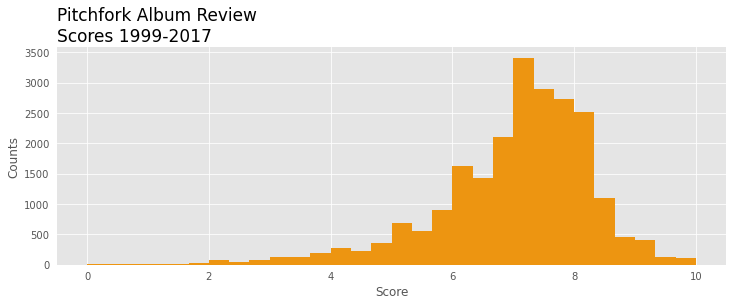

In [26]:
fig, ax = plt.subplots(figsize=(12,4))

remove_spine(ax)
plot_format()

plt.hist(scores_df["score"], color="#ed9511", bins=30)

plt.title("Pitchfork Album Review \nScores 1999-2017", loc='left', fontsize=17)

plt.ylabel("Counts")
plt.xlabel("Score")

plt.show()

As the histogram shows, the most common reviews are between a 7 and an 8 on Pitchfork's 10 point scale. The distribution is left-skewed and it shows that the majority of scores are between a 6 and an 8. According to this graph, the majority of reviews are positive.

Let's see if this trend is consistent over time by examining the histograms during different time periods in Pitchfork's history. If Pitchfork has been consistently positive in their reviews, we should see roughly the same left-skewed distribution that we see above for each of the time periods we use.

In [27]:
# First we'll create three dataframes where we'll store the reviews for three equal time periods.
scores_99_04 = scores_df[scores_df["year"] < 2005]
scores_05_10 = scores_df[(scores_df["year"] >= 2005)&(scores_df["year"]<2011)]
scores_11_17 = scores_df[(scores_df["year"]>= 2011)&(scores_df["year"]<2017)]

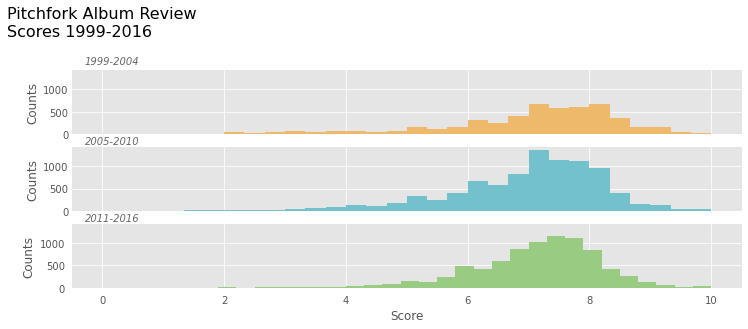

In [28]:
# Create 3 subplots for each of our datasets.
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,4), sharex=True, sharey=True)

def multi_hist(label, n= None, d=False):

    #Format each of our plots and label the y axis.
    for ax in (ax1, ax2, ax3):
        remove_spine(ax)
        ax.set_ylabel("Counts")

    plot_format()

    # Remove x-ticks on the first two plots.
    ax1.tick_params(axis='both', which='both', length=0)
    ax2.tick_params(axis='both', which='both', length=0)

    #Titles

    fig.text(x = 0.14, y= 0.9,s = "1999-2004", fontsize=10, fontstyle='italic', alpha=0.6)
    fig.text(x = 0.14, y= 0.625,s = "2005-2010", fontsize=10, fontstyle='italic', alpha=0.6)
    fig.text(x = 0.14, y= 0.355,s = "2011-2016", fontsize=10, fontstyle='italic', alpha=0.6)

    #Plot each of our datasets.
    ax1.hist(scores_99_04[label], color="#eeb96a", bins=n, density=d)
    ax2.hist(scores_05_10[label], color="#73c1cd", bins=n, density=d)
    ax3.hist(scores_11_17[label], color="#99cb83", bins=n, density=d)

    # Label the x-axis.
    plt.xlabel(str.capitalize(label))


    
multi_hist("score", 30)
fig.text(x = 0.05, y= 1,s = "Pitchfork Album Review \nScores 1999-2016", fontsize=16)
plt.show()

As can be seen above, the distribution is fairly consistent. Between 2011 and 2016, we can see that there are slightly fewer low scoring albums than in earlier years. Both earlier graphs show more albums scoring below a 6 than the 2011-2016 graphs. But, while this change is noticeable, it certainly doesn't seem drastic and it's fair to say, based on this chart, that Pitchfork has remained relatively consistent.

## 1.2 - What Genre's Does Pitchfork Review Most Often?
<a id='genre'></a>
Next, we'll look at the genres pitchfork has been reviewing. This time, we're going to normalize the historgram so that we can find the percentage of albums that fall into each genre in Pitchfork's reviews.

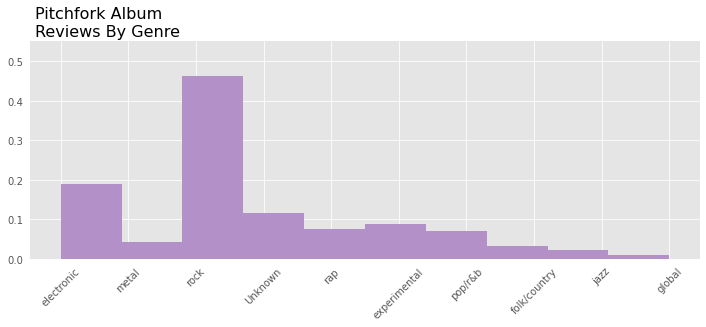

In [29]:
fig, ax = plt.subplots(figsize=(12,4))

remove_spine(ax)
plot_format()

plt.hist(scores_df["genre"], color="#b490c8", density=True)
plt.xticks(rotation=45)

fig.text(x = 0.13, y= 0.9,s = "Pitchfork Album \nReviews By Genre", fontsize=16)

plt.ylim(0,0.55)

plt.show()

As the graph above shows, almost half of the albums that Pitchfork reviews are rock albums while most other genres made up less than 10% of the total albums.

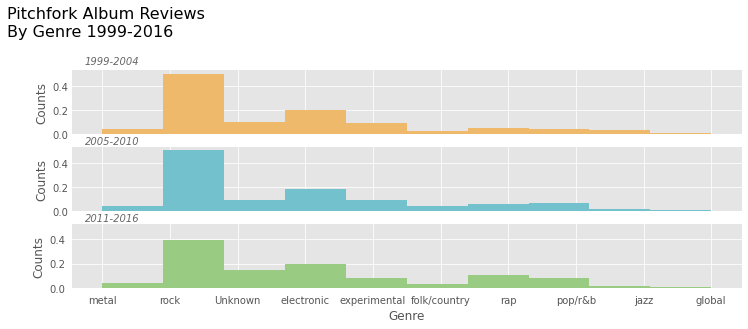

In [30]:
# Create 3 subplots for each of our datasets.
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,4), sharex=True, sharey=True)

multi_hist("genre", d=True)

fig.text(x = 0.05, y= 1,s = "Pitchfork Album Reviews \nBy Genre 1999-2016", fontsize=16)

plt.show()

The distribution is fairly consistent in each of our three time periods but one might note that the percentage of rock albums reviewed by Pitchfork declines by almost 10%. Between 1999 and 2010, rock albums are consistently just under 50% of the reviews in Pitchfork's catalog. In the 2011-2016 time period, this has declined to just below 40%.

To explore this topic further, I'd like to have a closer look at the share of genre reviews in Pitchfork's catalog on a yearly basis. In order to do this, we'll have to do another query from our dataset.

In [31]:

# Note, since there are much fewer reviews in the year 2017, 
# when this data was taken, we'll drop the year 2017 from our query.

genre_counts = pd.read_sql_query('''
                                    SELECT count(r.score) num_reviews, g.genre, r.pub_year year
                                    FROM reviews r
                                    LEFT JOIN genres g ON r.reviewid = g.reviewid
                                    WHERE pub_year < 2017 
                                    GROUP BY year, genre
                                    ORDER BY year DESC
                                    ''', cnx)

genre_counts["genre"]=genre_counts["genre"].fillna("Unknown")

genre_counts.head()

,num_reviews,genre,year
0,71,Unknown,2016
1,247,electronic,2016
2,129,experimental,2016
3,52,folk/country,2016
4,26,global,2016


Now that we have a dataframe to work with, we'll graph the number of reviews for each genre by year.

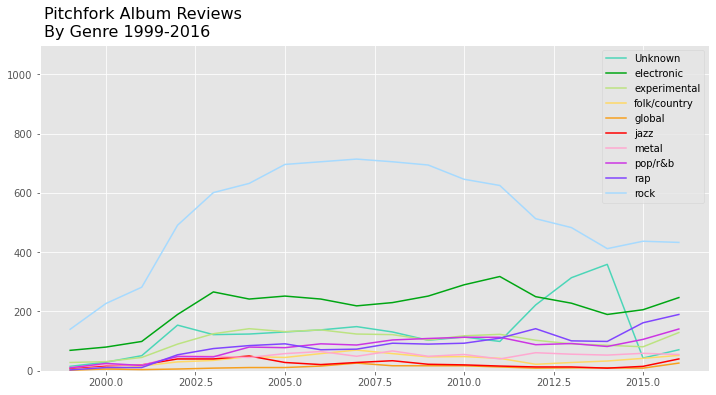

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_prop_cycle(color=['#4bd6b8', '#00a613', '#bce381', 
                         '#ffd966', '#f7a01e', '#ff0000', 
                         '#ffa8d1', '#cc34e3', '#8045ff', '#a6daff'])
def genre_tables(genre):
    new_df = genre_counts[genre_counts["genre"] == genre]
    ax.plot(new_df["year"], new_df["num_reviews"])
    
 
for genre in genre_counts["genre"].value_counts().index:
    genre_tables(genre)
    
fig.text(x = 0.13, y= 0.9,s = "Pitchfork Album Reviews \nBy Genre 1999-2016", fontsize=16)
    
plt.legend(genre_counts["genre"].value_counts().index, loc="best")
plt.ylim(0,1100)
plt.show()

The plot above confirms what could be seen from the data in our histograms. Beyond 2010, the share of Rock reviews begins to decline, although they still represent a much larger share than other genres.

## 2.1 - Have Pitchfork's Scores Changed Over Time? <a id='change'></a>

Next, I'd like to look at Pitchfork's average score over time. Was Pitchfork harsher in their early days and have they softened in their old age? Or were they placating famous artists when they were young so as not to rock the boat, only to become curmudgeons as they grew older?

To begin exploring this question, we'll need to make another SQL query from the database.

In [33]:
pitchfork_avg = pd.read_sql_query('''
                                    SELECT avg(score) avg_score, pub_date 
                                    FROM reviews 
                                    GROUP BY pub_date
                                    ''', cnx)
pitchfork_avg.head()

,avg_score,pub_date
0,6.500000,1999-01-05
1,6.750000,1999-01-12
2,6.850000,1999-01-26
3,7.200000,1999-02-01
4,7.966667,1999-02-09


In [34]:
# We'll use a rolling mean here so that the data is a bit more readable.
# We'll use a bimonthly 
pitchfork_avg["pub_date"] = pd.to_datetime(pitchfork_avg["pub_date"])
pitchfork_avg["rolling_mean_score"] = pitchfork_avg["avg_score"].rolling(60).mean()

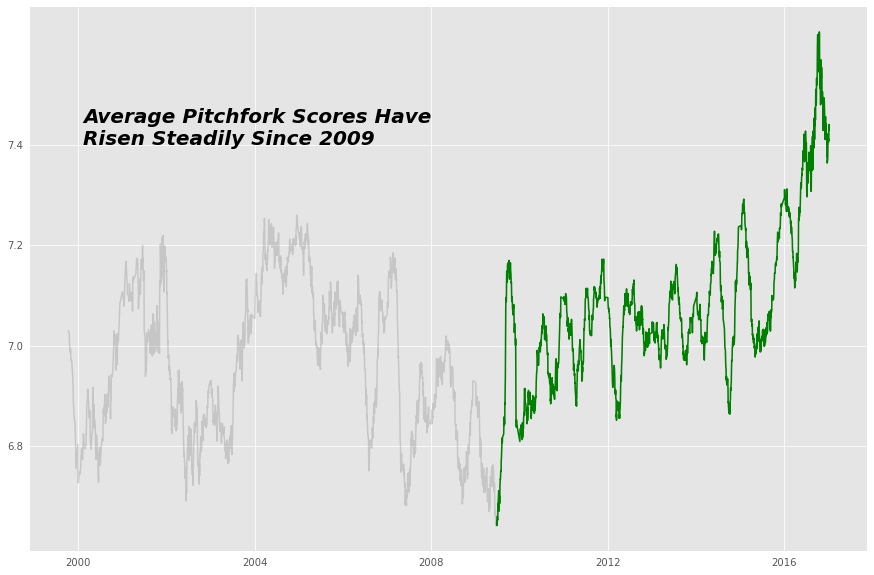

In [35]:
fig, ax = plt.subplots(figsize=(15,10))

plot_format()
remove_spine(ax)

ax.plot(pitchfork_avg["pub_date"], pitchfork_avg["rolling_mean_score"], color="grey", alpha=0.3)

ax.text(x=11000, y=7.4, s="Average Pitchfork Scores Have \nRisen Steadily Since 2009",
       fontweight="bold",fontsize=20, fontstyle="italic")


ax.plot(pitchfork_avg["pub_date"][2110:], pitchfork_avg["rolling_mean_score"][2110:], color="green", alpha=1)

ax.set_yticks([6.8,7.0,7.2, 7.4])
ax.set_xticks([dt.datetime(2000,1,1),dt.datetime(2004,1,1),dt.datetime(2008,1,1),dt.datetime(2012,1,1),dt.datetime(2016,1,1)])
ax.set_xticklabels([2000,2004,2008,2012,2016])

plt.show()

As the graph above shows, Pitchfork reviews have been rising since 2009 and, around 2015, the average began to rise sharply. Between 1999 and 2009, the average lingered around a 7.0 before it rose to almost a 7.5.

## 2.2 - Examining "Bad" Scores
<a id='bad'></a>
To explore Pitchfork's changing average score, we'll look at low scoring albums or "bad" scores. One way Pitchfork's average scores could change is if there were fewer lower scoring album reviews. This would lead to a growth in the average over time.

In order to find this, we'll use another SQL query to capture only "bad" scores. Here, we'll define a score as "bad" if it is a 4 or lower. This is a fairly arbitrary threshold, but if we focus on scores that are *particularly* low, then we should be targetting scores that would pull down the average more.

In [36]:
bad_scores = pd.read_sql_query('''SELECT count(score) num_reviews, pub_year year 
                                    FROM reviews 
                                    WHERE score < 4
                                    GROUP BY year''', cnx)

bad_scores.head()

,num_reviews,year
0,15,1999
1,26,2000
2,24,2001
3,68,2002
4,78,2003


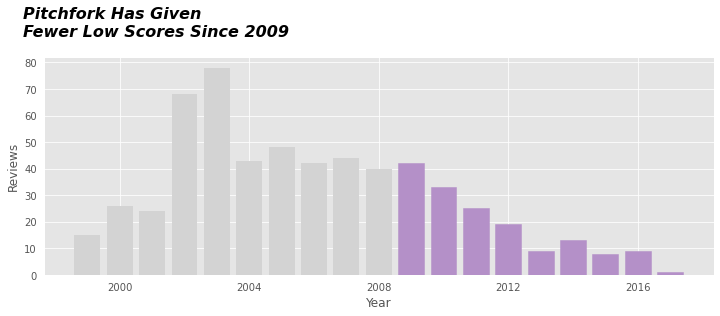

In [37]:
fig, ax = plt.subplots(figsize=(12,4))
plot_format()

ax.set_xticks([2000,2004,2008,2012,2016])
ax.set_xticklabels([2000,2004,2008,2012,2016])

graph = ax.bar(bad_scores["year"], bad_scores["num_reviews"], color='lightgrey')
for g in graph[10:]:
    g.set_color('#b490c8')
    
ax.text(x=1997, y=90, s="Pitchfork Has Given \nFewer Low Scores Since 2009",
       fontweight="bold",fontsize=16, fontstyle="italic")

plt.ylabel("Reviews")
plt.xlabel("Year")
    
plt.show()

The numer of low scoring albums declined significantly starting in 2009 which aligns perfectly with the rise in scores we saw in the graph in 2.1. Between 2004 and 2009, there were consistently 40 bad scores per year. In 2009 this number began to decline until it stagnated to around 10 bad scores per year.

## 2.3 - Examining "Good" Scores
<a id ='good'></a>
Another potential cause of Pitchfork's rising average scores could be if they were ranking more albums as "good" than they had done in the past. 

We'll have to make another SQL Query from our database. This time, we'll define "good" scores as those scores that are higher than an 7.

In [38]:
good_scores = pd.read_sql_query('''SELECT count(score) num_reviews, pub_year year 
                                    FROM reviews 
                                    WHERE score >= 7
                                    GROUP BY year''', cnx)

good_scores.head()

,num_reviews,year
0,123,1999
1,201,2000
2,296,2001
3,543,2002
4,657,2003


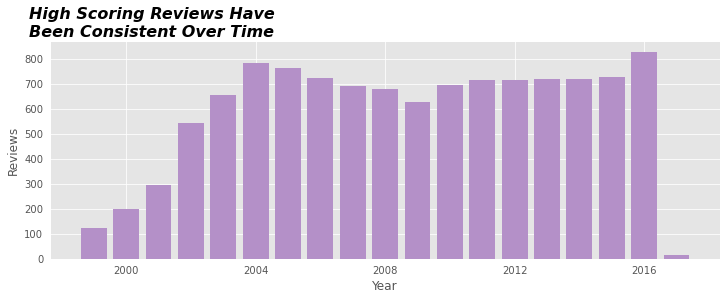

In [39]:
fig, ax = plt.subplots(figsize=(12,4))
plot_format()

ax.set_xticks([2000,2004,2008,2012,2016])
ax.set_xticklabels([2000,2004,2008,2012,2016])

ax.bar(good_scores["year"], good_scores["num_reviews"], color='#b490c8')
    
ax.text(x=1997, y=890, s="High Scoring Reviews Have \nBeen Consistent Over Time",
       fontweight="bold",fontsize=16, fontstyle="italic")

plt.ylabel("Reviews")
plt.xlabel("Year")
    
plt.show()

With the exception of 2016 in which there was a considerable spike, high scoring reviews have remained fairly consistent over time.

This tells us that the cause of the rising Pitchfork scores between 2009 and 2016 is mostly a result of fewer low scores given out by Pitchfork rather than an increase in high scores.

## Conclusion

To summarize the findings of this project:

First, we explored the scores that Pitchfork typically gives in an album review and we found the following:

* Most scores were between a 7 and an 8. 
* The distribution of scores was fairly consistent over time.

Next, we looked at the genres of the albums Pitchfork reviews and we found that:

* Rock albums made up nearly half of the reviews in Pitchfork's catalog.
* Between 2011 and 2016, the share of rock albums that Pitchfork reviewed declined by a significant amount.

Finally, we looked at Pitchfork's average score over time:

* The average score has been rising since 2009.
* The rising score is a result of a decline in low scoring albums.